# Generació gràfiques perfil del vent

Importació llibreries essencials.

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Importació dades, que es troben en un fitxer tipus `.csv`.

In [85]:
data = pd.read_csv('Dades_vents.csv', delimiter = ";")
data = pd.DataFrame(data)
data

,Amb_Rotor,Distància_(cm),Potència,Adalt_esq,Adalt_mig,Adalt_dreta,Mig_esq,Mig_mig,Mig_dreta,Baix_esq,Baix_mig,Baix_dreta
0,0,4,1,16,"15,5",16,"15,5","12,2","15,5",16,"15,5",16
1,0,4,2,"17,8","17,1","17,8","17,3","13,7","17,3","17,8","17,1","17,8"
2,0,4,3,"19,4","18,6","19,4","19,1","14,8","19,1","19,4","18,6","19,4"
3,0,24,1,"14,4","13,4","14,4","14,4",9,"14,4","14,4","13,4","14,4"
4,0,24,2,"15,8","14,9","15,8","15,8","10,4","15,8","15,8","14,9","15,8"
5,0,24,3,"16,6",16,"16,6","16,9","11,5","16,9","16,6",16,"16,6"
6,0,44,1,"10,8","7,4","10,8","10,4","8,3","10,4","10,8","7,4","10,8"
7,0,44,2,"12,4","8,2","12,4","12,4",9,"12,4","12,4","8,2","12,4"
8,0,44,3,14,"10,4",14,"13,2","9,4","13,2",14,"10,4",14
9,1,24,1,"6,5",9,"10,1","8,6","5,8","10,1","10,1","8,3",4


Creació de funció que ens permet extreure les dades per fila i agregar-les en una estructura de dades.

In [86]:
def getInfo(dataFrameDades):
    #Funció que extreu informació de cada fila
    matrices = []
    for _, row in dataFrameDades.iterrows():
        ambRotor = int(row["Amb_Rotor"])
        distancia = int(row["Distància_(cm)"])
        potencia = int(row["Potència"])
        velocitats = [float(v.replace(',', '.')) for v in row.iloc[3:12]]
        matriu = np.array(velocitats).reshape(numFiles, numCols)
        matrices.append((matriu, ambRotor, distancia, potencia))
    return matrices

Creació de les gràfiques.

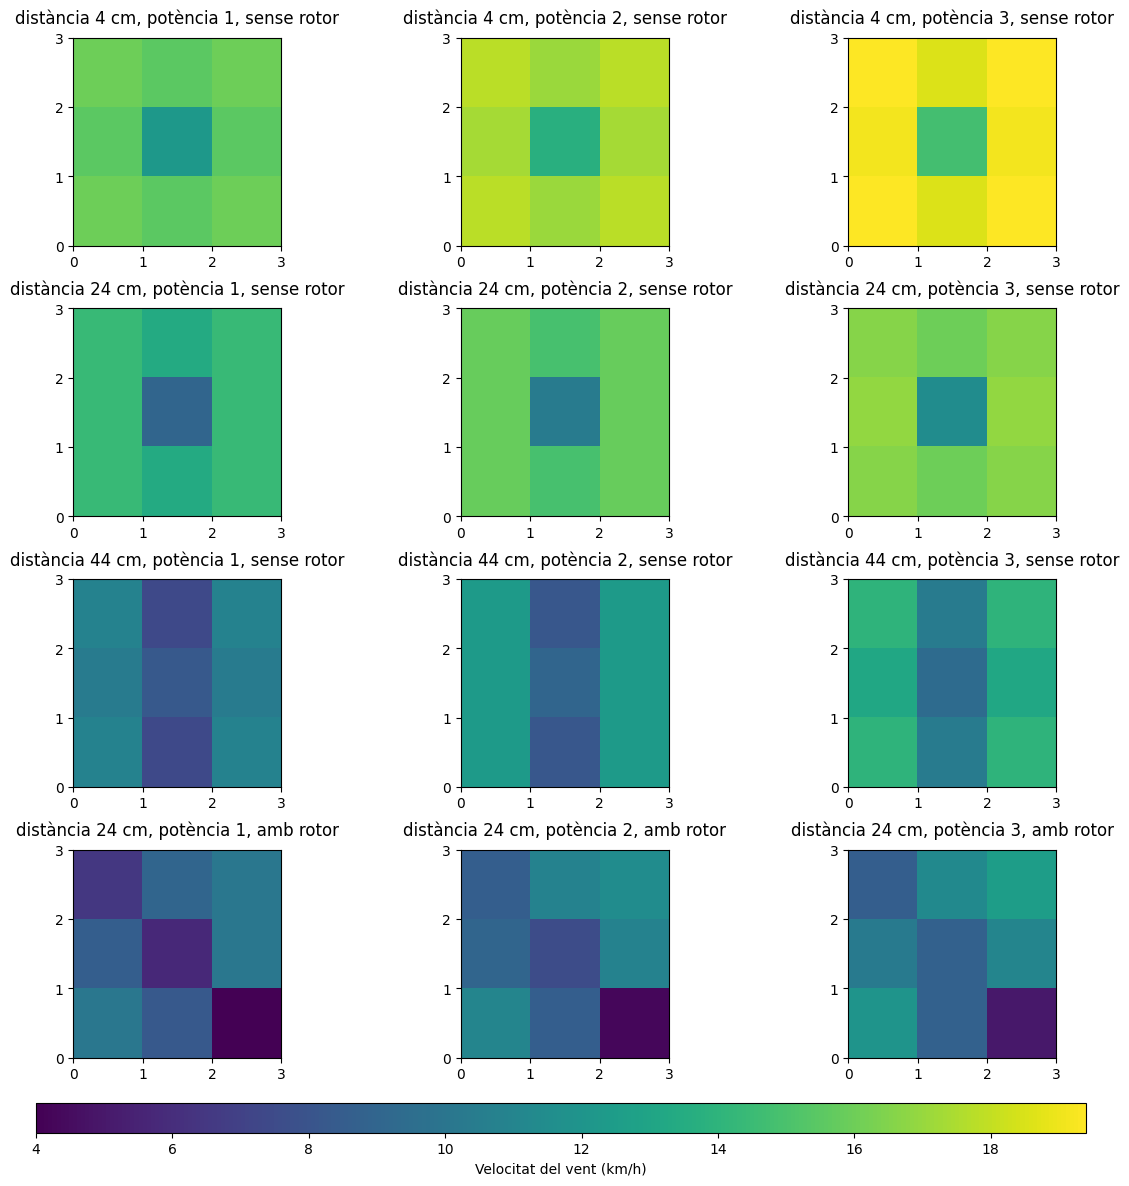

In [87]:
numFiles = 3  # Subdivisions eix vertical
numCols = 3   # Subdivisions eix horitzontal

def creaGraficVelocitats(ambRotor, distancia, potencia, matriu, ax, vmin, vmax):
    if ambRotor == 0:
        text = 'sense'
    else:
        text = 'amb'
    
    # Visualització de la matriu amb títol i etiquetes
    cax = ax.imshow(matriu, cmap='viridis', origin='upper', vmin=vmin, vmax=vmax)
    
    # Configura les marques als marges de les columnes i files
    x_ticks = np.arange(0, numCols + 1)  # Ajustar marques al final de les columnes
    y_ticks = np.arange(0, numFiles + 1)  # Ajustar marques al final de les files
    ax.set_xticks(x_ticks - 0.5)
    ax.set_yticks(y_ticks - 0.5)

    # Etiquetes de les marques
    ax.set_xticklabels([f'{i}' for i in range(0, numCols + 1)])
    ax.set_yticklabels([f'{i}' for i in reversed(range(0, numFiles + 1 ))])

    ax.set_title(f'distància {distancia} cm, potència {potencia}, {text} rotor', pad = 10)
    return cax

# Llista per emmagatzemar totes les matrius i altres paràmetres
matrices = getInfo(data)

# Càlcul rang de valors dels gràfics, trobant el valor mínim i màxim de velocitat del vent
vmin = min(matriz.min() for matriz, _, _, _ in matrices)
vmax = max(matriz.max() for matriz, _, _, _ in matrices)

# Nombre de files i columnes que hi haurà al gràfic. Sabem que farem 12
numColsGrafic = 3
numFilesGrafic = 4

# La figura es composarà de diverses gràfiques
fig, axs = plt.subplots(nrows=numFilesGrafic, ncols=numColsGrafic, figsize=(15, 15))

# Aplanem la matriu de subgràfics en una llista per facilitar-ne l'accés
axs = axs.flatten()

# Crea els gràfics a la quadrícula de subgràfics
for idx, (matriu, ambRotor, distancia, potencia) in enumerate(matrices):
    cax = creaGraficVelocitats(ambRotor, distancia, potencia, matriu, axs[idx], vmin, vmax)

# Afegeix la barra de colors al final de la figura
fig.subplots_adjust(bottom=0.2)  # Ajusta l'espai inferior
cbar_ax = fig.add_axes([0.16, 0.15, 0.7, 0.02])  # [esquerra, avall, amplada, alçada]
fig.colorbar(cax, cax=cbar_ax, orientation='horizontal', label='Velocitat del vent (km/h)')

# Ajusta l'espaiat entre subgràfics
plt.subplots_adjust(hspace=0.3, wspace=0)

filename = "Gràfica Velocitats vents experiments.png"

plt.savefig(filename, dpi = 150, bbox_inches='tight')

# Mostra els gràfics
plt.show()
